In [ ]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5

     |████████████████████████████████| 358kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=9bb9af705185ffaf35f04eb083f97c34bc677ad53b889202271a5df2e5746b1c
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 276kB 4.9MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=6dc0130c96261afcd2053d0849ed20b4359e2cc27e5b39aa7837791669e94f38
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 112kB 6.0MB/s 


In [ ]:
# load the dataset 
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = pd.read_excel('/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/condition Hydraulic.xlsx')
data.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,35.166667,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,35.000000,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,NaN,1.113217,59.543150,3,100,0,130,1,34.833333,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,34.666667,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,34.500000,0


In [ ]:
data.isnull().sum()

Unnamed: 0     0
cycle_id       0
date           0
PS1            0
PS2            0
PS3            0
PS4            0
PS5            0
PS6            0
FS1            0
FS2            0
TS1            0
TS2            0
TS3            0
TS4            0
P1             0
VS1            0
CE1            1
CP1            0
SE1            0
cooler         0
valve          0
leakage        0
accumulator    0
stable         0
rul            0
label1         0
dtype: int64

In [ ]:
df = pd.DataFrame(data, columns=['date','PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'cooler', 'valve', 'leakage', 'accumulator', 'label1'])

In [ ]:
df = df.fillna(method='ffill')

In [ ]:
df.head()

,date,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,label1
0,2019-01-01 00:00:00,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,0
1,2019-01-01 00:10:00,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,0
2,2019-01-01 00:20:00,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150,3,100,0,130,0
3,2019-01-01 00:30:00,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,0
4,2019-01-01 00:40:00,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,0


In [ ]:
df.describe()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,label1
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,1.753227,2.600266,9.163320,6.198549,9.649453,45.424567,2495.509203,0.613315,31.300695,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.700680
std,4.699425,0.251902,4.279355,0.576296,1.032883,0.449246,7.991933,73.836682,0.060260,11.574310,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.458064
min,155.391547,0.840252,0.000000,8.365800,2.018572,8.857513,35.313783,2361.747267,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,158.100195,1.729733,0.000000,8.547239,6.391670,9.203397,36.237150,2442.933467,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,158.960895,1.779631,0.000000,9.115781,6.576673,9.692270,44.836650,2480.926633,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,1.000000
75%,161.000735,1.932047,3.503266,9.844351,6.657508,10.155008,54.104317,2548.211467,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,180.922708,2.023398,10.207068,9.978510,6.722707,10.403098,57.899283,2740.641000,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


In [ ]:
X = df.iloc[:,1:13]
y = df.iloc[:, 17]

In [ ]:
X.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label1, dtype: int64

In [ ]:
X.shape

(2205, 12)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
#test_y = le.fit_transform(test_y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes = 2)
y_test = keras.utils.to_categorical(y_test, num_classes = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15,kernel_initializer='he_uniform',activation='relu',input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                195       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history=classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 16, epochs = 300)

Epoch 1/300
89/89 [==============================] - 4s 7ms/step - loss: 0.7356 - accuracy: 0.6701 - val_loss: 0.5956 - val_accuracy: 0.7422
Epoch 2/300
89/89 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7886 - val_loss: 0.5277 - val_accuracy: 0.7394
Epoch 3/300
89/89 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.7901 - val_loss: 0.4893 - val_accuracy: 0.7734
Epoch 4/300
89/89 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8391 - val_loss: 0.4543 - val_accuracy: 0.8527
Epoch 5/300
89/89 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8814 - val_loss: 0.4213 - val_accuracy: 0.8810
Epoch 6/300
89/89 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.9051 - val_loss: 0.3877 - val_accuracy: 0.8980
Epoch 7/300
89/89 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.9079 - val_loss: 0.3562 - val_accuracy: 0.9235
Epoch 8/300
8

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       132
           1       0.96      0.98      0.97       309

    accuracy                           0.96       441
   macro avg       0.96      0.95      0.95       441
weighted avg       0.96      0.96      0.96       441

[[120  12]
 [  5 304]]


In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

Feature: 0, Score: 0.13684
Feature: 1, Score: 0.10807
Feature: 2, Score: 0.12918
Feature: 3, Score: 0.16154
Feature: 4, Score: 0.03564
Feature: 5, Score: 0.14529
Feature: 6, Score: 0.21902
Feature: 7, Score: 0.11317
Feature: 8, Score: 0.16819
Feature: 9, Score: 0.17719
Feature: 10, Score: 0.30061
Feature: 11, Score: 0.08679


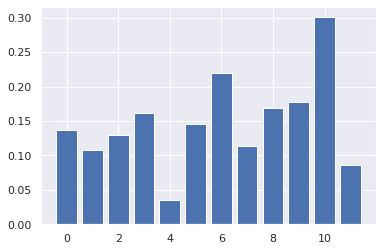

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(classifier, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
classifier.save('stable.h5')

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini",                # Criterion
                                  max_depth =4 ,  
                                  min_samples_split = 2, # Max Height of Tree
                                  min_samples_leaf = 1,              # Maximum Leaf samples
                                  random_state = 100)

clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)  

print ("Accuracy : ", accuracy_score(y_test,y_pred_gini)*100)         # Evaulating predictions with test labels
print ("Report : ",  classification_report(y_test, y_pred_gini))
text_representation = tree.export_text(clf_gini, feature_names=X.columns.tolist())
print(text_representation)
# get importance
importance = clf_gini.feature_importances_
# summarize feature importance
for feature_names,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (feature_names,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, tick_label= X.columns)
pyplot.show()

Accuracy :  95.91836734693877
Report :                precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       0.97      0.97      0.97       309

    accuracy                           0.96       441
   macro avg       0.95      0.95      0.95       441
weighted avg       0.96      0.96      0.96       441

|--- FS1 <= 6.58
|   |--- SE1 <= 59.65
|   |   |--- PS1 <= 173.45
|   |   |   |--- class: 1
|   |   |--- PS1 >  173.45
|   |   |   |--- SE1 <= 31.26
|   |   |   |   |--- class: 1
|   |   |   |--- SE1 >  31.26
|   |   |   |   |--- class: 0
|   |--- SE1 >  59.65
|   |   |--- CE1 <= 21.73
|   |   |   |--- FS1 <= 6.56
|   |   |   |   |--- class: 0
|   |   |   |--- FS1 >  6.56
|   |   |   |   |--- class: 1
|   |   |--- CE1 >  21.73
|   |   |   |--- class: 0
|--- FS1 >  6.58
|   |--- CE1 <= 27.02
|   |   |--- TS1 <= 54.28
|   |   |   |--- CE1 <= 26.62
|   |   |   |   |--- class: 0
|   |   |   |--- CE1 >  26.62
|   |   |   |   |--- 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1866 ± 0.0124,CE1
0.1587 ± 0.0090,FS1
0.1207 ± 0.0065,SE1
0.0814 ± 0.0068,PS5
0.0585 ± 0.0068,TS1
0.0347 ± 0.0066,PS1
0.0101 ± 0.0022,CP1
0 ± 0.0000,VS1
0 ± 0.0000,P1
0 ± 0.0000,FS2
